In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

In [2]:
dataset_dir = "caltech-101-img"

dataset_datagen = ImageDataGenerator(rescale=1.0/255)
dataset_generator = dataset_datagen.flow_from_directory(dataset_dir, batch_size=2000, target_size=(64,64), class_mode='categorical')

Found 9144 images belonging to 102 classes.


In [3]:
x_train, y_train = dataset_generator[0]
x_test, y_test = dataset_generator[1]

In [4]:
weights_path="vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [5]:
for layer in base_model.layers:
    layer.trainable=False

In [6]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation = "softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=10)

Epoch 1/10
32/32 [==============================] - 25s 760ms/step - loss: 4.0050 - accuracy: 0.1935 - val_loss: 3.3639 - val_accuracy: 0.2955
Epoch 2/10
32/32 [==============================] - 24s 756ms/step - loss: 3.0907 - accuracy: 0.3350 - val_loss: 2.9203 - val_accuracy: 0.3820
Epoch 3/10
32/32 [==============================] - 24s 762ms/step - loss: 2.5748 - accuracy: 0.4500 - val_loss: 2.6107 - val_accuracy: 0.4425
Epoch 4/10
32/32 [==============================] - 24s 770ms/step - loss: 2.1700 - accuracy: 0.5245 - val_loss: 2.3661 - val_accuracy: 0.4855
Epoch 5/10
32/32 [==============================] - 24s 773ms/step - loss: 1.8403 - accuracy: 0.5920 - val_loss: 2.2428 - val_accuracy: 0.4970
Epoch 6/10
32/32 [==============================] - 25s 778ms/step - loss: 1.6093 - accuracy: 0.6565 - val_loss: 2.1033 - val_accuracy: 0.5270
Epoch 7/10
32/32 [==============================] - 25s 778ms/step - loss: 1.4125 - accuracy: 0.6870 - val_loss: 2.0156 - val_accuracy: 0.5405

In [7]:
predicted_value = model.predict(x_test)
labels = list(dataset_generator.class_indices.keys())

63/63 [==============================] - 14s 222ms/step


butterfly
butterfly


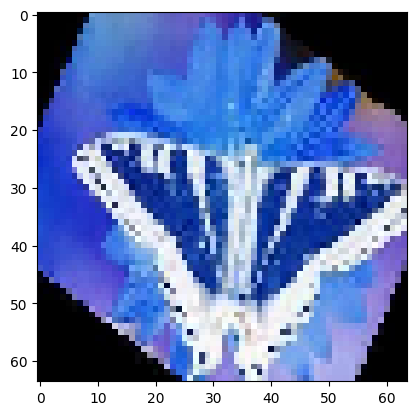

In [17]:
n=95
plt.imshow(x_test[n])
print(labels[np.argmax(predicted_value[n])])
print(labels[np.argmax(y_test[n])])